In [3]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
print('Training data shape:', X_train.shape)
print('Training labels shape:',y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


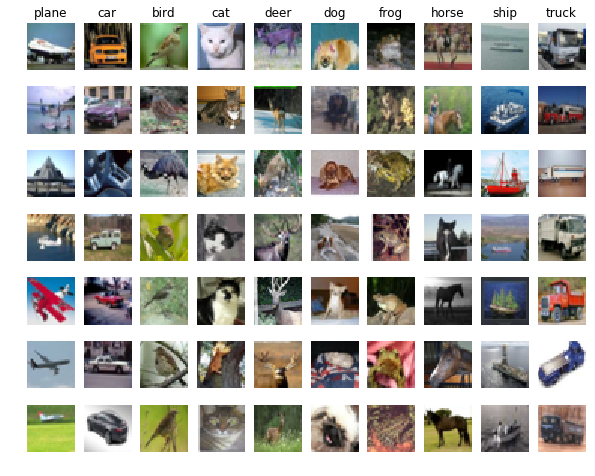

In [79]:
classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train==y)  #返回非零下标
#     print(idxs)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y +1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [80]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [73]:
print(X_train.shape, X_test.shape)
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 32, 32, 3) (500, 32, 32, 3)
(5000, 3072) (500, 3072)


In [8]:
from cs231n.classifiers import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [9]:
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


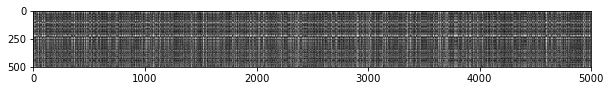

In [10]:
plt.imshow(dists, interpolation='none')
plt.show()

- 500 in the 50000, has the same img
- 

In [11]:
y_test_pred = classifier.predict_labels(dists, k=1)

num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [12]:
dists_one = classifier.compute_distances_one_loop(X_test)

In [13]:
difference = np.linalg.norm(dists-dists_one, ord = 'fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good!The distance matrices are the same')
else:
    print('Uh-oh!The distance matrices are different')

Difference was: 0.000000
Good!The distance matrices are the same


In [14]:
dists_two = classifier.compute_distances_no_loops(X_test)

difference = np.linalg.norm(dists - dists_two, ord = 'fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [18]:
def time_function(f, *args):
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic
two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)
one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)
no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

Two loop version took 81.633255 seconds
One loop version took 71.416600 seconds
No loop version took 0.794013 seconds


In [92]:
num_folds = 5
k_choices = [1,3,5,8,10,12,15,20,50,100]
X_train_folds = []
y_train_folds = []
##########################################
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)

#############################################
k_to_accuracies = {}
############################################
knn = KNearestNeighbor()
for i in range(5):
    X_test_cross = X_train_folds[i]
    X_train_cross = np.concatenate(X_train_folds[:i] + X_train_folds[i+1:])
    y_test_cross = y_train_folds[i]
    y_train_cross = np.concatenate(y_train_folds[:i] + y_train_folds[i+1:])
    X_train_cross = np.reshape(X_train_cross, (X_train_cross.shape[0], -1))
    X_test_cross = np.reshape(X_test_cross, (X_test_cross.shape[0], -1))
#     print(X_test_cross.shape, X_train_cross.shape)
#     print(y_test_cross.shape, y_train_cross.shape)
    knn.train(X_train_cross, y_train_cross)
    for j in range(len(k_choices)):
        kk = k_choices[j]
        y_pred = knn.predict(X_test_cross, kk, 0)
        num_correct = np.sum(y_pred == y_test_cross)
        if kk in k_to_accuracies:
            k_to_accuracies[kk].append(float(num_correct) / len(y_test_cross))
        else:
            k_to_accuracies[kk] = [float(num_correct) / len(y_test_cross)]
##############################################
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k=%d, accuracy=%f' % (k,accuracy))
        

k=1, accuracy=0.263000
k=1, accuracy=0.257000
k=1, accuracy=0.264000
k=1, accuracy=0.278000
k=1, accuracy=0.266000
k=3, accuracy=0.239000
k=3, accuracy=0.249000
k=3, accuracy=0.240000
k=3, accuracy=0.266000
k=3, accuracy=0.254000
k=5, accuracy=0.248000
k=5, accuracy=0.266000
k=5, accuracy=0.280000
k=5, accuracy=0.292000
k=5, accuracy=0.280000
k=8, accuracy=0.262000
k=8, accuracy=0.282000
k=8, accuracy=0.273000
k=8, accuracy=0.290000
k=8, accuracy=0.273000
k=10, accuracy=0.265000
k=10, accuracy=0.296000
k=10, accuracy=0.276000
k=10, accuracy=0.284000
k=10, accuracy=0.280000
k=12, accuracy=0.260000
k=12, accuracy=0.295000
k=12, accuracy=0.279000
k=12, accuracy=0.283000
k=12, accuracy=0.280000
k=15, accuracy=0.252000
k=15, accuracy=0.289000
k=15, accuracy=0.278000
k=15, accuracy=0.282000
k=15, accuracy=0.274000
k=20, accuracy=0.270000
k=20, accuracy=0.279000
k=20, accuracy=0.279000
k=20, accuracy=0.282000
k=20, accuracy=0.285000
k=50, accuracy=0.271000
k=50, accuracy=0.288000
k=50, accura

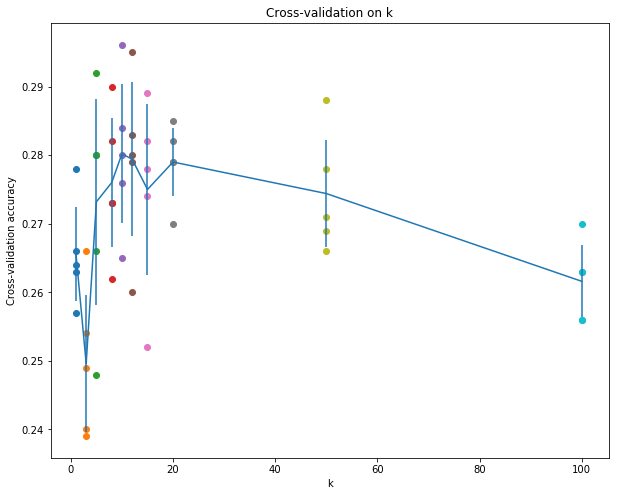

In [98]:
for k in k_choices:
    accuracies = k_to_accuracies[k]
    # [k] * 5 = [k,k,k,k,k]
    plt.scatter([k] * len(accuracies), accuracies)

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()
    

In [101]:
best_k = 10
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

ValueError: shapes (500,32,32,3) and (3,32,32,5000) not aligned: 3 (dim 3) != 32 (dim 2)